# Contexte

Ce projet rentre dans la formation "Computer Vision with Python" proposée par IEEE ENP Student Branch. A travers ce court projet vous aurez à revoir les principes de classification utilisant des méthodes de Machine Learning classique comme vus durant la séance 3. 

Ce projet se base sur ce [dataset](https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification) donnant les données CTG (cardiotocogramme) pour définir les taux de risques de maladie de foetus, donc l'objectif est de classer les différents cas en trois catégories : 
- Normal : 1
- Suspect : 2
- Malade : 3

Ainsi ce genre de projet vous permettra de vous entraîner sur de vrais problématiques. 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Pour tester les performances des modèles utilisés
from sklearn import metrics

# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# Resampling 
from sklearn.utils import resample


# Charger les données

In [3]:
fetal_data = pd.read_csv("fetal_health.csv")
fetal_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


Rapide analyse des données 
- Voir les types des données
- Distribution des classes
- Y a des valeurs manquantes ou pas ?
- Un petit describe pour voir l'étendue de chaque variable

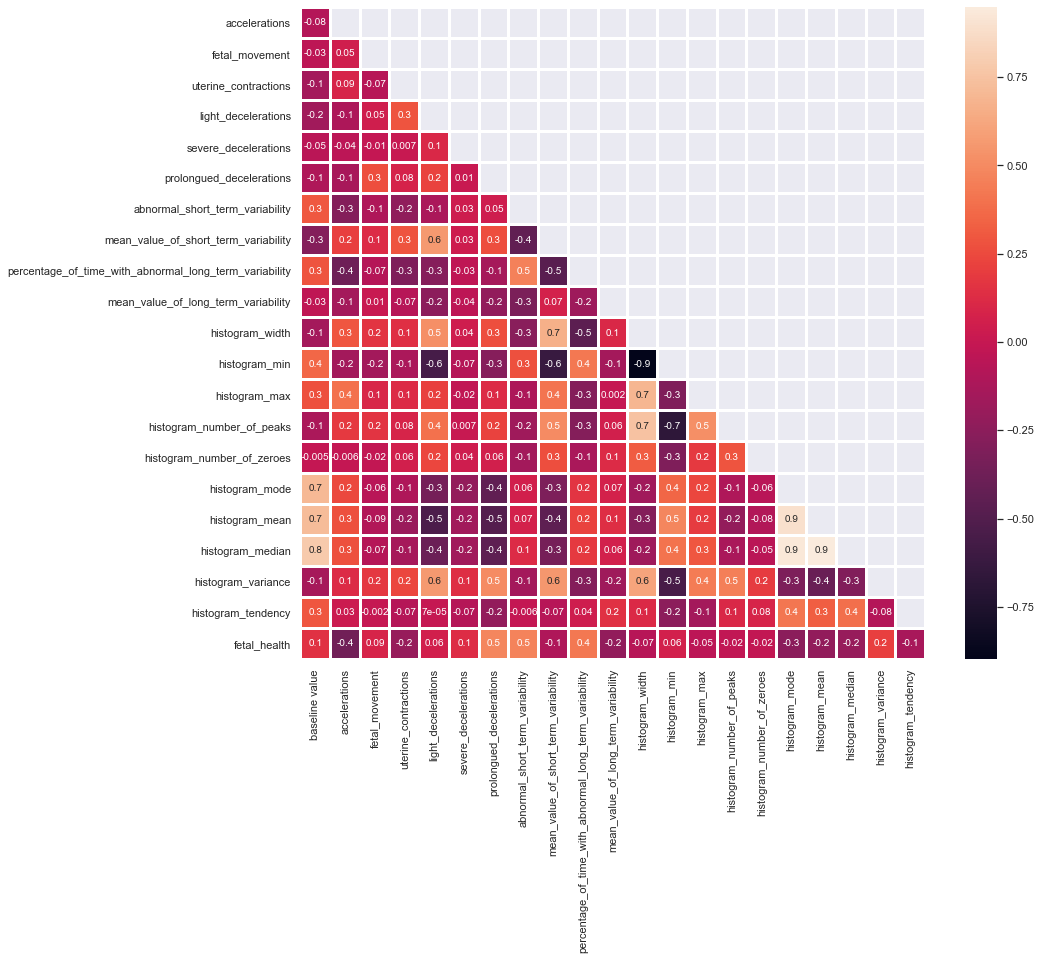

In [15]:
plt.figure(figsize=(14,12))
mask = np.triu(np.ones_like(fetal_data.corr(), dtype=bool))
sns.heatmap(fetal_data.corr().iloc[1:,:-1], mask=mask[1:,:-1], annot=True, fmt=".1g", linewidths=2.0, annot_kws={"size": 10})
plt.show()

M'inspirer de [ca](https://www.kaggle.com/code/yuvalaltman/fetal-health-classification)
- Correlation entre les variables et le target
- Features selection (ranking, PCA...)
- Des graphiques de distribution avec Seaborn
- Voir la préparation des données (standard scaler)
- Mettre en place les métriques d'évaluation
- Mettre cross validation avec RepeatedStratifiedKFold (voir l'inspiration)
- Investiguez l'utilisation de différents classifieurs (KNN, SVM, Random Forest)
- Investigez ensuite des classifieurs comme XGBoost et suivre l'inspiration du notebook 
    - Voir comment l'optimiser
    - Voir comment avoir le meilleur modèle possible
- Investiguez l'utilisation de méthodes de Features selection
    - Ranking 
    - PCA
- 